In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [12]:
# Set font to match Latex
plt.rcParams.update({
    "text.usetex": False,
    "font.family": "serif",
})

In [13]:
df = pd.read_csv('life_expectancy.csv') 
df

,Country,Year,"Mean Years of Schooling, female (years)","Share of seats in parliament, male (% held by men)",Mean Years of Schooling (years),Inequality in income,Carbon dioxide emissions per capita (production) (tonnes),"Expected Years of Schooling, male (years)",Expected Years of Schooling (years),"Labour force participation rate, female (% ages 15 and older)",...,Mean Age Childbearing (years),Sex Ratio at Birth (males per 100 female births),Total Deaths (thousands),Male Deaths (thousands),Female Deaths (thousands),"Crude Death Rate (deaths per 1,000 population)","Life Expectancy at Birth, both sexes (years)",Live births Surviving to Age 1 (thousands),Net Number of Migrants (thousands),"Net Migration Rate (per 1,000 population)"
0,Afghanistan,1990,0.342503,NaN,0.971125,NaN,0.209727,3.939093,2.504050,15.180,...,29.880,105.5,203.514,110.102,93.412,18.449,45.9672,519.005,-666.001,-60.375
1,Afghanistan,1991,0.371860,NaN,1.019356,NaN,0.182525,4.171640,2.806550,15.214,...,29.812,105.6,192.531,104.274,88.257,17.946,46.6631,509.662,39.926,3.721
2,Afghanistan,1992,0.401218,NaN,1.067586,NaN,0.095233,4.417915,3.109050,15.223,...,29.885,105.6,191.913,104.633,87.280,17.222,47.5955,532.989,1834.556,164.629
3,Afghanistan,1993,0.430575,NaN,1.115817,NaN,0.084285,4.678730,3.411550,15.197,...,29.948,105.6,199.165,104.343,94.822,14.838,51.4664,646.635,1171.818,87.304
4,Afghanistan,1994,0.459933,NaN,1.164047,NaN,0.075054,4.954942,3.714050,15.178,...,29.789,105.7,222.214,119.122,103.092,14.689,51.4945,732.684,665.410,43.986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6203,Zimbabwe,2017,8.061880,63.848396,8.461690,27.01627,0.673026,12.039037,11.853943,80.285,...,27.979,102.2,122.177,62.092,60.084,8.266,60.7095,464.979,-59.918,-4.054
6204,Zimbabwe,2018,8.178377,65.714286,8.585395,27.01627,0.821010,12.154317,11.981767,80.309,...,27.956,102.3,120.252,60.873,59.379,7.972,61.4141,468.496,-59.918,-3.972
6205,Zimbabwe,2019,8.296558,65.428571,8.710909,28.76901,0.747610,12.270700,12.110969,80.339,...,27.934,102.3,123.744,63.152,60.592,8.043,61.2925,469.639,-59.918,-3.895
6206,Zimbabwe,2020,8.296558,65.428571,8.710909,28.76901,0.708562,12.270700,12.110969,78.980,...,27.916,102.4,127.551,66.267,61.284,8.132,61.1242,471.214,-29.955,-1.910


In [14]:
column_list = df.columns.to_list()
for i in column_list:
    print(i)

Country
Year
Mean Years of Schooling, female (years)
Share of seats in parliament, male (% held by men)
Mean Years of Schooling (years)
Inequality in income
Carbon dioxide emissions per capita (production) (tonnes)
Expected Years of Schooling, male (years)
Expected Years of Schooling (years)
Labour force participation rate, female (% ages 15 and older)
Population with at least some secondary education, female (% ages 25 and older)
Expected Years of Schooling, female (years)
Adolescent Birth Rate (births per 1,000 women ages 15-19)
Material footprint per capita (tonnes)
Mean Years of Schooling, male (years)
Population with at least some secondary education, male (% ages 25 and older)
Share of seats in parliament, female (% held by women)
Inequality in eduation
Gender Development Index (value)
Coefficient of human inequality
Labour force participation rate, male (% ages 15 and older)
Human Development Index (value)
Gross National Income Per Capita (2017 PPP$)
Total Population, as of 1 Ja

In [15]:
df.columns = df.columns.str.lower()
# Dictionary mapping old column names to new column names
column_rename_dict = {
    'country': 'country',
    'year': 'year',
    'mean years of schooling, female (years)': 'mean_years_of_schooling_female',
    'share of seats in parliament, male (% held by men)': 'share_of_male_seats_in_parliament',
    'mean years of schooling (years)': 'mean_years_of_schooling',
    'inequality in income': 'income_inequality',
    'carbon dioxide emissions per capita (production) (tonnes)': 'co2_emissions_per_capita_tonnes',
    'expected years of schooling, male (years)': 'expected_years_of_schooling_male',
    'expected years of schooling (years)': 'expected_years_of_schooling',
    'labour force participation rate, female (% ages 15 and older)': 'female_labour_force_participation_rate',
    'population with at least some secondary education, female (% ages 25 and older)': 'female_population_with_some_secondary_education',
    'expected years of schooling, female (years)': 'expected_years_of_schooling_female',
    'adolescent birth rate (births per 1,000 women ages 15-19)': 'adolescent_birth_rate_per_1000_women_ages_15_19',
    'material footprint per capita (tonnes)': 'material_footprint_per_capita_tonnes',
    'mean years of schooling, male (years)': 'mean_years_of_schooling_male',
    'population with at least some secondary education, male (% ages 25 and older)': 'male_population_with_some_secondary_education',
    'share of seats in parliament, female (% held by women)': 'share_of_female_seats_in_parliament',
    'inequality in eduation': 'education_inequality',
    'gender development index (value)': 'gender_development_index',
    'coefficient of human inequality': 'coefficient_of_human_inequality',
    'labour force participation rate, male (% ages 15 and older)': 'male_labour_force_participation_rate',
    'human development index (value)': 'human_development_index',
    'gross national income per capita (2017 ppp$)': 'gross_national_income_per_capita_2017_ppp',
    'total population, as of 1 january (thousands)': 'total_population_as_of_january_1st_thousands',
    'total population, as of 1 july (thousands)': 'total_population_as_of_july_1st_thousands',
    'male population, as of 1 july (thousands)': 'male_population_as_of_july_1st_thousands',
    'female population, as of 1 july (thousands)': 'female_population_as_of_july_1st_thousands',
    'population density, as of 1 july (persons per square km)': 'population_density_as_of_july_1st_persons_per_square_km',
    'population sex ratio, as of 1 july (males per 100 females)': 'population_sex_ratio_as_of_july_1st_males_per_100_females',
    'median age, as of 1 july (years)': 'median_age_as_of_july_1st_years',
    'natural change, births minus deaths (thousands)': 'natural_change_births_minus_deaths_thousands',
    'rate of natural change (per 1,000 population)': 'rate_of_natural_change_per_1000_population',
    'population change (thousands)': 'population_change_thousands',
    'population growth rate (percentage)': 'population_growth_rate_percentage',
    'population annual doubling time (years)': 'population_annual_doubling_time_years',
    'births (thousands)': 'births_thousands',
    'births by women aged 15 to 19 (thousands)': 'births_by_women_aged_15_to_19_thousands',
    'crude birth rate (births per 1,000 population)': 'crude_birth_rate_births_per_1000_population',
    'total fertility rate (live births per woman)': 'total_fertility_rate_live_births_per_woman',
    'net reproduction rate (surviving daughters per woman)': 'net_reproduction_rate_surviving_daughters_per_woman',
    'mean age childbearing (years)': 'mean_age_of_childbearing_years',
    'sex ratio at birth (males per 100 female births)': 'sex_ratio_at_birth_males_per_100_female_births',
    'total deaths (thousands)': 'total_deaths_thousands',
    'male deaths (thousands)': 'male_deaths_thousands',
    'female deaths (thousands)': 'female_deaths_thousands',
    'crude death rate (deaths per 1,000 population)': 'crude_death_rate_deaths_per_1000_population',
    'life expectancy at birth, both sexes (years)': 'life_expectancy_at_birth_both_sexes_years',
    'live births surviving to age 1 (thousands)': 'live_births_surviving_to_age_1_thousands',
    'net number of migrants (thousands)': 'net_number_of_migrants_thousands',
    'net migration rate (per 1,000 population)': 'net_migration_rate_per_1000_population'
}

# Rename columns
df_new = df.copy()
df_new = df.rename(columns=column_rename_dict, errors='raise')


In [16]:
df_new.isnull().sum().to_csv('desc_groupby_country.csv')

In [17]:
null_counts = df_new.groupby('country').apply(lambda x: x.isnull().sum())

null_counts_per_country = null_counts.sum(axis=1)
null_counts_per_country.sort_values(ascending=False).iloc[0:20]

country
Monaco                   591
San Marino               510
Nauru                    494
Micronesia               464
Somalia                  441
North Korea              440
Antigua and Barbuda      431
Dominica                 428
Marshall Islands         419
Saint Kitts and Nevis    403
Grenada                  399
Liechtenstein            392
Palau                    386
Andorra                  364
Kiribati                 354
Vanuatu                  341
Equatorial Guinea        326
Solomon Islands          319
South Sudan              314
Seychelles               313
dtype: int64

In [18]:
label_encoder_df = LabelEncoder()

df_new["country_id"] = label_encoder_df.fit_transform(df_new["country"])
df_new = df_new.set_index("country", append=True)

y_col = ["life_expectancy_at_birth_both_sexes_years"]
x_col =[col for col in df_new.columns.to_list() if col not in y_col]

print(x_col)

['year', 'mean_years_of_schooling_female', 'share_of_male_seats_in_parliament', 'mean_years_of_schooling', 'income_inequality', 'co2_emissions_per_capita_tonnes', 'expected_years_of_schooling_male', 'expected_years_of_schooling', 'female_labour_force_participation_rate', 'female_population_with_some_secondary_education', 'expected_years_of_schooling_female', 'adolescent_birth_rate_per_1000_women_ages_15_19', 'material_footprint_per_capita_tonnes', 'mean_years_of_schooling_male', 'male_population_with_some_secondary_education', 'share_of_female_seats_in_parliament', 'education_inequality', 'gender_development_index', 'coefficient_of_human_inequality', 'male_labour_force_participation_rate', 'human_development_index', 'gross_national_income_per_capita_2017_ppp', 'total_population_as_of_january_1st_thousands', 'total_population_as_of_july_1st_thousands', 'male_population_as_of_july_1st_thousands', 'female_population_as_of_july_1st_thousands', 'population_density_as_of_july_1st_persons_per

In [19]:
def drop_countries_missing_values(df, threshold=0.6):

    # Count total rows per country
    total_rows_per_country = df.groupby(level='country').size()

    # Count missing values per country
    missing_values_per_country = df.groupby(level='country')['expected_years_of_schooling'].apply(lambda x: x.isnull().sum())

    # Calculate threshold count per country
    threshold_count_per_country = total_rows_per_country * threshold

    # Filter countries based on the threshold
    countries_to_drop = missing_values_per_country[missing_values_per_country > threshold_count_per_country].index.tolist()

    # Filter countries where more than half of the total rows have missing values
    countries_to_drop = [country for country in countries_to_drop if missing_values_per_country[country] > total_rows_per_country[country] / 2]

    # Drop countries from the DataFrame
    df_filtered = df.drop(countries_to_drop, level='country')

    return df_filtered, countries_to_drop

In [20]:
df_filtered, dropped_countries = drop_countries_missing_values(df_new)
print("Dropped countries:", dropped_countries)

Dropped countries: ['Monaco', 'North Korea', 'San Marino', 'Somalia', 'South Sudan']


In [21]:
# Train-Test split
X_train, X_test, y_train, y_test = train_test_split(df_new[x_col], df_new[y_col], test_size=0.2, random_state=42, stratify=df_new['country_id'])

In [22]:
def fill_missing(group):
    if group.isnull().any():
        filled_fw = group.ffill()
        filled_bw = group.bfill()
        mean_values = (filled_fw + filled_bw) / 2
        print(mean_values)
        group_filled = group.fillna(mean_values)
        return group_filled
    else:
        return group


def estimate_missing_values_grouped(df_group, variables):
    # Calculate growth rates based on existing values
    df_group = df_group.sort_values(by="year", axis=0)
    
    for var in variables:
        df_group[f"growth_rate_{var}"] = df_group[var].pct_change()
    
        # Replace NaN growth rates with 0
        df_group[f"growth_rate_{var}"].fillna(0, inplace=True)
    
        # Calculate average growth rate
        avg_growth_rate = df_group.loc[df_group[f"growth_rate_{var}"] != 0, [f"growth_rate_{var}"]].mean()
    
        # Fill missing values using the average growth rate
        for i in range(len(df_group)-2, -1, -1):
            if pd.isna(df_group.at[df_group.index[i], var]):
                df_group.at[df_group.index[i], var] = df_group.at[df_group.index[i+1], var] / (1 + avg_growth_rate)
    
        # Drop Growth Rate column
        df_group.drop(columns=[f"growth_rate_{var}"], inplace=True)
    
    return df_group

In [23]:
X_train_filled_avg = X_train.groupby('country_id').apply(estimate_missing_values_grouped, variables=(['expected_years_of_schooling']))

X_train_filled_avg.to_csv('xtrain_avg.csv')

/var/folders/w4/480s5y550tj_ptr0wg8vn_6m0000gn/T/ipykernel_25273/1311223827.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  df_group.at[df_group.index[i], var] = df_group.at[df_group.index[i+1], var] / (1 + avg_growth_rate)
/var/folders/w4/480s5y550tj_ptr0wg8vn_6m0000gn/T/ipykernel_25273/1311223827.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  df_group.at[df_group.index[i], var] = df_group.at[df_group.index[i+1], var] / (1 + avg_growth_rate)
/var/folders/w4/480s5y550tj_ptr0wg8vn_6m0000gn/T/ipykernel_25273/1311223827.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  df_group.at[df_group.index[i], var] = df_group.at[df_group.index[i+1], var] / (1 + avg_growth_rate)
/var/folders/w4/

/var/folders/w4/480s5y550tj_ptr0wg8vn_6m0000gn/T/ipykernel_25273/1311223827.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  df_group.at[df_group.index[i], var] = df_group.at[df_group.index[i+1], var] / (1 + avg_growth_rate)
/var/folders/w4/480s5y550tj_ptr0wg8vn_6m0000gn/T/ipykernel_25273/1311223827.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  df_group.at[df_group.index[i], var] = df_group.at[df_group.index[i+1], var] / (1 + avg_growth_rate)
/var/folders/w4/480s5y550tj_ptr0wg8vn_6m0000gn/T/ipykernel_25273/1311223827.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  df_group.at[df_group.index[i], var] = df_group.at[df_group.index[i+1], var] / (1 + avg_growth_rate)
/var/folders/w4/

In [24]:

X_train_filled = X_train.groupby('country').apply(estimate_missing_values_grouped, variables=(['expected_years_of_schooling']))
X_test_filled = X_test.groupby('country').apply(estimate_missing_values_grouped, variables=(['expected_years_of_schooling']))


# Combine results into one DataFrame if not empty
X_train_filled = X_train_filled.reset_index(level=0, drop=True)
X_train_filled = pd.concat([X_train_filled], axis=1)
X_test_filled = X_test_filled.reset_index(level=0, drop=True)
X_test_filled = pd.concat([X_test_filled], axis=1)

X_train_filled_new = X_train
X_test_filled_new = X_test

# Fill remaining missing values
X_train_filled_new['expected_years_of_schooling'] = X_train_filled['expected_years_of_schooling'].fillna(X_train_filled['expected_years_of_schooling'].mean())
X_test_filled_new['expected_years_of_schooling'] = X_test_filled['expected_years_of_schooling'].fillna(X_train_filled['expected_years_of_schooling'].mean())

# Save null counts per group to CSV
X_train_filled.isnull().sum().to_csv('desc_groupby_country_filled.csv')

X_train_filled.to_csv('xtrainfilled.csv')

/var/folders/w4/480s5y550tj_ptr0wg8vn_6m0000gn/T/ipykernel_25273/1311223827.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  df_group.at[df_group.index[i], var] = df_group.at[df_group.index[i+1], var] / (1 + avg_growth_rate)
/var/folders/w4/480s5y550tj_ptr0wg8vn_6m0000gn/T/ipykernel_25273/1311223827.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  df_group.at[df_group.index[i], var] = df_group.at[df_group.index[i+1], var] / (1 + avg_growth_rate)
/var/folders/w4/480s5y550tj_ptr0wg8vn_6m0000gn/T/ipykernel_25273/1311223827.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  df_group.at[df_group.index[i], var] = df_group.at[df_group.index[i+1], var] / (1 + avg_growth_rate)
/var/folders/w4/

#### Correlation (Q2)

In [25]:
corrs = {x: X_train[x].corr(y_train[y_col[0]], method='pearson') for x in x_col}
corrs_df = pd.DataFrame.from_dict(corrs, orient='index', columns=['Pearson Correlation'])
corrs_df = corrs_df.sort_values(by='Pearson Correlation', ascending=False)

# Reducing table to only variables with correlation greater than absolute 0.5
halfs = corrs_df[(corrs_df['Pearson Correlation'] >=0.5) | (corrs_df['Pearson Correlation']<=-0.5)]
halfs

,Pearson Correlation
human_development_index,0.918225
expected_years_of_schooling_female,0.819319
expected_years_of_schooling_male,0.789534
median_age_as_of_july_1st_years,0.787636
expected_years_of_schooling,0.780634
mean_years_of_schooling_female,0.745772
mean_years_of_schooling,0.736279
mean_years_of_schooling_male,0.723730
female_population_with_some_secondary_education,0.687381
male_population_with_some_secondary_education,0.649895


We can drop the variable ```human_development_index``` as it is a function of life expectancy at birth, education, and other variables and therefore doesn't have any real causality to the life expectancy at birth variable. We can use ```expected_years_of_schooling``` as there may be causality (we can drop the female and male tagged versions of the variable).

## Linear Regression
OLS model with ```expected_years_of_schooling``` as the dependent variable to predice LEB (Life Expectancy at Birth)

In [26]:
reg = LinearRegression().fit(X_train_filled_new[['expected_years_of_schooling']], y_train)
score = reg.score(X_train_filled_new[['expected_years_of_schooling']], y_train)
coef = reg.coef_
intercept = reg.intercept_

print(f"Score: {score}, Coefficient: {coef}, Intercept: {intercept}")

Score: 0.6093892672803605, Coefficient: [[2.24333262]], Intercept: [41.74845868]


In [27]:
X_train_filled_new[['expected_years_of_schooling']]

,,expected_years_of_schooling
,country,
2650,Iceland,19.174509
2492,Indonesia,13.606980
771,Barbados,13.182037
2153,Equatorial Guinea,6.917641
2799,Japan,14.520056
...,...,...
3445,Morocco,11.438870
1404,Czechia,16.238991
3878,Mauritania,5.728160


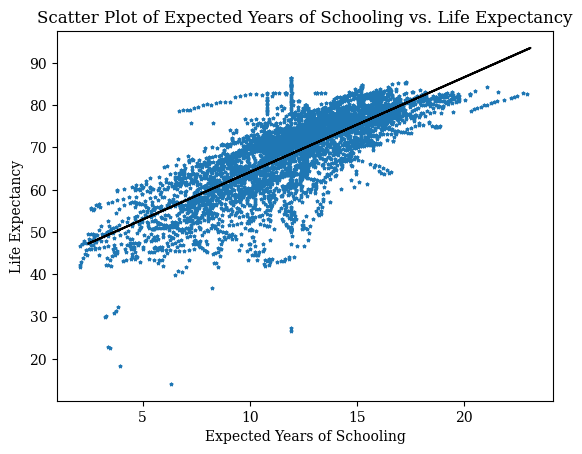

In [28]:
y_pred = reg.predict(X_test[['expected_years_of_schooling']])

# Scatter plot
plt.scatter(X_train_filled_new[['expected_years_of_schooling']], y_train[y_col[0]], s=5, marker='*')
plt.xlabel('Expected Years of Schooling')
plt.ylabel('Life Expectancy')
plt.title('Scatter Plot of Expected Years of Schooling vs. Life Expectancy')

plt.plot(X_test_filled_new[['expected_years_of_schooling']], y_pred, color='black')

In [29]:
y_pred.shape
#y_test[y_col[0]].shape

(1242, 1)

In [30]:
y_pred = y_pred.flatten()

correlation = np.corrcoef(y_pred, y_test[y_col[0]])[0, 1]
mse = mean_squared_error(y_test[y_col[0]], y_pred)

print(f"correlation: {correlation}, mse: {mse}")

correlation: 0.7840713364770301, mse: 34.593968687154174


### Spearman Correlation to assess monotonic and non-linear relationship (Q3)

In [31]:
corrs_sm = {x: X_train[x].corr(y_train[y_col[0]], method='spearman') for x in x_col}
corrs_sm_df = pd.DataFrame.from_dict(corrs_sm, orient='index', columns=['Spearman Correlation'])
corrs_sm_df = corrs_sm_df.sort_values(by='Spearman Correlation', ascending=False)

# Reducing table to only variables with correlation greater than absolute 0.5
halfs_sm = corrs_sm_df[(corrs_sm_df['Spearman Correlation'] >= 0.5) | (corrs_sm_df['Spearman Correlation']<= -0.5)]
halfs_sm

,Spearman Correlation
human_development_index,0.928500
median_age_as_of_july_1st_years,0.862968
gross_national_income_per_capita_2017_ppp,0.862426
expected_years_of_schooling_female,0.837628
expected_years_of_schooling_male,0.812609
expected_years_of_schooling,0.796117
material_footprint_per_capita_tonnes,0.778640
co2_emissions_per_capita_tonnes,0.753853
mean_years_of_schooling_female,0.745417
mean_years_of_schooling,0.737145


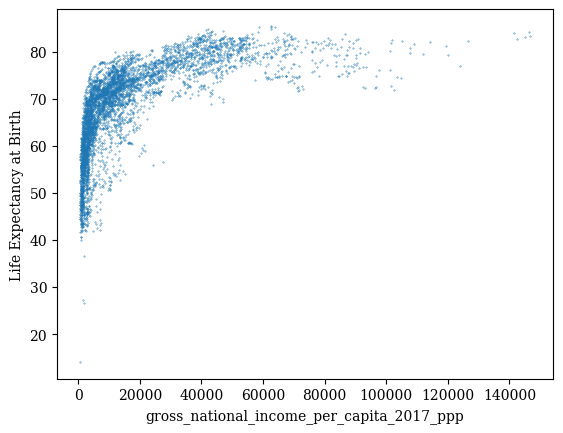

In [32]:
variable = 'gross_national_income_per_capita_2017_ppp'

# test log transformation for a linear relationship
X_train[f"{variable}_log"] = np.log(X_train[variable])

plt.scatter(X_train[variable], y_train, s=0.1)
plt.xlabel(f"{variable}")
plt.ylabel('Life Expectancy at Birth')
plt.show()

In [33]:
corr_old = halfs.loc[variable]['Pearson Correlation']
corr_new = X_train[f"{variable}_log"].corr(y_train[y_col[0]], method='pearson')
print(f""" 
    Variable: {variable}
    Pearson Correlation (old): {corr_old}
    Pearson Correlation (new): {corr_new}
""")

 
    Variable: gross_national_income_per_capita_2017_ppp
    Pearson Correlation (old): 0.6498319595423842
    Pearson Correlation (new): 0.8315956495896552



### Multiple Linear Regression (Q4)

In [34]:
new_corrs = {x: X_train[x].corr(y_train[y_col[0]], method='pearson') for x in X_train.columns}
new_corrs_df = pd.DataFrame.from_dict(new_corrs, orient='index', columns=['Pearson Correlation'])
new_corrs_df = new_corrs_df.sort_values(by='Pearson Correlation', ascending=False)

# Reducing table to only variables with correlation greater than absolute 0.5
new_halfs = new_corrs_df[(new_corrs_df['Pearson Correlation'] >= 0.5) | (new_corrs_df['Pearson Correlation']<=-0.5)]
new_halfs

,Pearson Correlation
human_development_index,0.918225
gross_national_income_per_capita_2017_ppp_log,0.831596
expected_years_of_schooling_female,0.819319
expected_years_of_schooling_male,0.789534
median_age_as_of_july_1st_years,0.787636
expected_years_of_schooling,0.780634
mean_years_of_schooling_female,0.745772
mean_years_of_schooling,0.736279
mean_years_of_schooling_male,0.723730
female_population_with_some_secondary_education,0.687381


In [35]:
undesired_variables = ['expected_years_of_schooling', 'expected_years_of_schooling_female',
 'expected_years_of_schooling_male', 'mean_years_of_schooling_female', 'mean_years_of_schooling_male', 'coefficient_of_human_inequality']

# Creating variable subsets
positive_corr_variables = [index for index, row in new_halfs.iterrows() if row['Pearson Correlation'] > 0.75 and index not in undesired_variables]
negative_corr_variables = [index for index, row in new_halfs.iterrows() if row['Pearson Correlation'] < -0.75 and index not in undesired_variables]
absolute_corr_variables = [index for index, row in new_halfs.iterrows() if abs(row['Pearson Correlation']) > 0.70 and index not in undesired_variables]

In [36]:
print(f"Subset 1: {positive_corr_variables}")
print(f"Subset 2: {negative_corr_variables}")
print(f"Subset 3: {absolute_corr_variables}")

X_train[absolute_corr_variables].isnull().to_csv("missinvalues.csv")


Subset 1: ['human_development_index', 'gross_national_income_per_capita_2017_ppp_log', 'median_age_as_of_july_1st_years']
Subset 2: ['net_reproduction_rate_surviving_daughters_per_woman', 'adolescent_birth_rate_per_1000_women_ages_15_19', 'total_fertility_rate_live_births_per_woman', 'crude_birth_rate_births_per_1000_population']
Subset 3: ['human_development_index', 'gross_national_income_per_capita_2017_ppp_log', 'median_age_as_of_july_1st_years', 'mean_years_of_schooling', 'net_reproduction_rate_surviving_daughters_per_woman', 'adolescent_birth_rate_per_1000_women_ages_15_19', 'total_fertility_rate_live_births_per_woman', 'crude_birth_rate_births_per_1000_population']


In [37]:
reg_pos = LinearRegression().fit(X_train_filled_new[positive_corr_variables], y_train)
score_pos = reg.score(X_train_filled_new[positive_corr_variables], y_train)
coef_pos = reg.coef_
intercept_pos = reg.intercept_

print(f"Score: {score_pos}, Coefficient: {coef_pos}, Intercept: {intercept_pos}")

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values